## Explore the data ##

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
QVI_beha=pd.read_csv('C:/Users/xiaoyuwan/OneDrive/unimelb/pythonlecture unimelb/machine_learning/Quan-Simu/QVI_purchase_behaviour.csv')
QVI_beha.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
QVI_tran=pd.read_excel('C:/Users/xiaoyuwan/OneDrive/unimelb/pythonlecture unimelb/machine_learning/Quan-Simu/QVI_transaction_data.xlsx')
QVI_tran.head()

In [ ]:
QVI_merge=pd.merge(QVI_tran,QVI_beha,on='LYLTY_CARD_NBR',how='left')
QVI_merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
QVI_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [ ]:
QVI_merge.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

### Covert DATE column to a date format ###

In [ ]:
# A quick search online tells us that CSV and Excel integers dates begin on 3- DEC - 1899
from datetime import date, timedelta
start=date(1899,12,30)
new_date=[]
for date in QVI_merge['DATE']:
    delta=timedelta(days=date)
    new_date.append(start+delta)

Using box plot to check the outliers of PROD_QTY and TOT_SALES

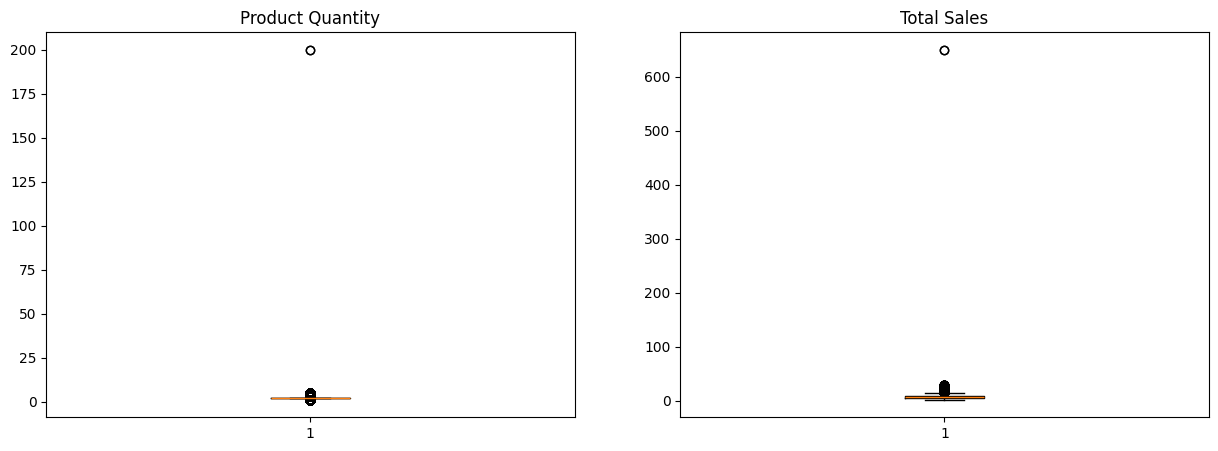

In [ ]:
figure, ax=plt.subplots(1,2,figsize=(15,5))
ax[0].boxplot(QVI_merge['PROD_QTY'])
ax[1].boxplot(QVI_merge['TOT_SALES'])
ax[0].set_title('Product Quantity')
ax[1].set_title('Total Sales')
plt.show()

From the two graphs above, we can see that there is an outlier of 200 in PROD_QTY, and an outlier of over 600 in TOT_SALES.

### Examine PROD_NAME ###

In [ ]:
QVI_merge['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
#Removing numbers and extra spaces on transaction data
QVI_merge['PROD_NAME'].unique()
product_word=pd.DataFrame({"words":" ".join(QVI_merge['PROD_NAME']).split()})
product_word=product_word['words'].replace(r'(\d+g)|[^\w\s]|(\d+G)','',regex=True) 
product_word=product_word[product_word!='']
# Lets look at the most common words by counting the number of times
# a word appears and sorting them
product_word=product_word.value_counts().reset_index()
product_word.colunms=['words','count']
product_word

C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_4076\234949845.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  product_word.colunms=['words','count']


,words,count
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
188,Sunbites,1432
189,Pc,1431
190,NCC,1419
191,Garden,1419


In [ ]:
QVI_merge['PROD_NAME']


0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

### Removing Salsa products ###

In [ ]:

QVI_merge['SALSA']=QVI_merge['PROD_NAME'].str.lower().str.contains('salsa')
QVI_merge=QVI_merge[~QVI_merge['SALSA']].copy()
QVI_merge.drop(columns='SALSA',inplace=True)
QVI_merge


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


It appears that this dataset does not contain any null values; however, there are some outliers, which align with the findings from the previous box plot. Regarding PROD_QTY, an outlier is at 200, and for TOT_SALES, the outlier is at 650.

In [ ]:
# Filter the dataset to find the outleir
QVI_merge.isna().sum()
outlier_1=QVI_merge[QVI_merge['PROD_QTY']>=200] 
outlier_1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


In [ ]:
Outlier_CUS=QVI_merge[QVI_merge['LYLTY_CARD_NBR']==226000]
Outlier_CUS

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,OLDER FAMILIES,Premium


That's better. Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [ ]:
QVI_merge.drop(index=Outlier_CUS.index,inplace=True)

In [ ]:
QVI_merge.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,43464.054843,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,105.396396,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


### Count the number of transactions by date ###

In [ ]:
tranDate=QVI_merge['DATE'].value_counts().reset_index()
tranDate.columns=['DATE','TRAN_COUNT']
tranDate['DATE']=pd.to_datetime(tranDate['DATE'],origin='1899-12-30',unit='D')
tranDate=tranDate.dropna(subset=['DATE'])
date_range=pd.date_range(start="2018-07-01",end="2019-06-30")
date_seq=pd.DataFrame({'DATE':date_range})
transaction_date=pd.merge(date_seq,tranDate,on='DATE',how='left')
transaction_date['TRAN_COUNT'].fillna(0,inplace=True)
tranDate


,DATE,TRAN_COUNT
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a chart of number of transactions over time to find the missing date.

### Create a sequence of dates and join this the count of transaction by date ###

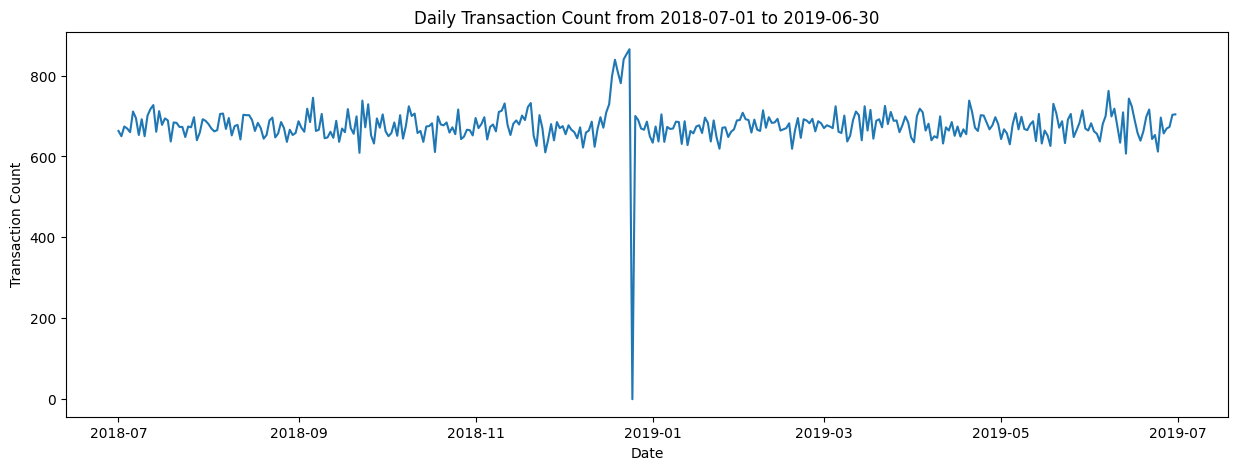

In [ ]:
figure, ax=plt.subplots(figsize=(15,5))
plt.plot(transaction_date['DATE'],transaction_date['TRAN_COUNT'])
plt.title('Daily Transaction Count from 2018-07-01 to 2019-06-30')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this.

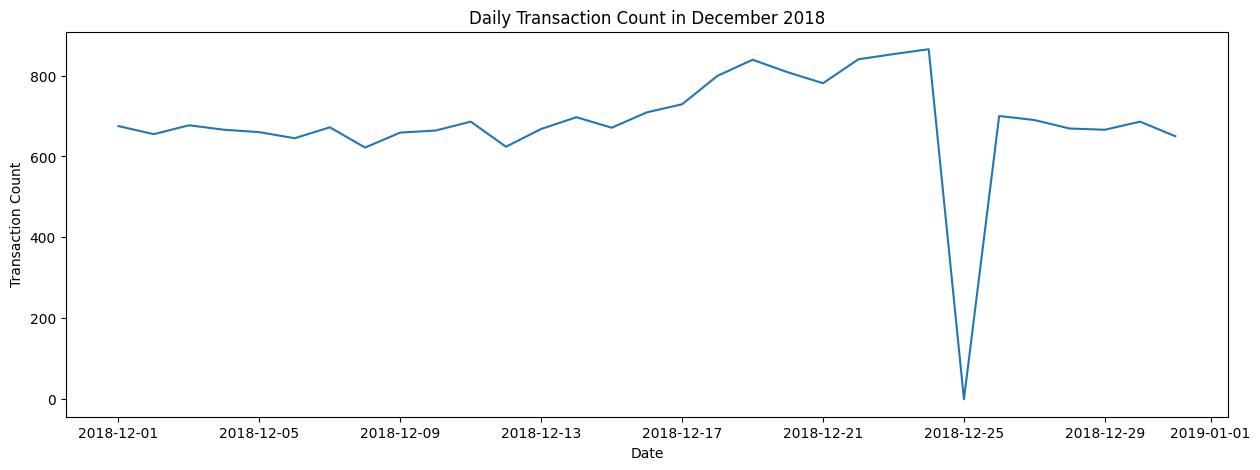

In [ ]:
December=(transaction_date['DATE']>='2018-12-01') & (transaction_date['DATE']<='2018-12-31')
December=transaction_date[December]
figure, ax=plt.subplots(figsize=(15,5))
plt.plot(December['DATE'],December['TRAN_COUNT'])
plt.title('Daily Transaction Count in December 2018')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME. We will start with pack size.

### Pack size ###

In [ ]:
# We can work this out by taking the digits that appear in the PROD_NAME
QVI_merge['PACK_SIZE']=QVI_merge['PROD_NAME'].str.extract(r'(\d+)',expand=False).astype(float)
pack_size_counts = QVI_merge.groupby('PACK_SIZE').size().reset_index(name='N')
pack_size_counts=pack_size_counts.sort_values(by='PACK_SIZE',ascending=False)
pack_size_counts

,PACK_SIZE,N
19,380.0,6416
18,330.0,12540
17,270.0,6285
16,250.0,3169
15,220.0,1564
14,210.0,6272
13,200.0,4473
12,190.0,2995
11,180.0,1468
10,175.0,66390


The largest size is 380g and the smallest size is 70g - seems sensible!

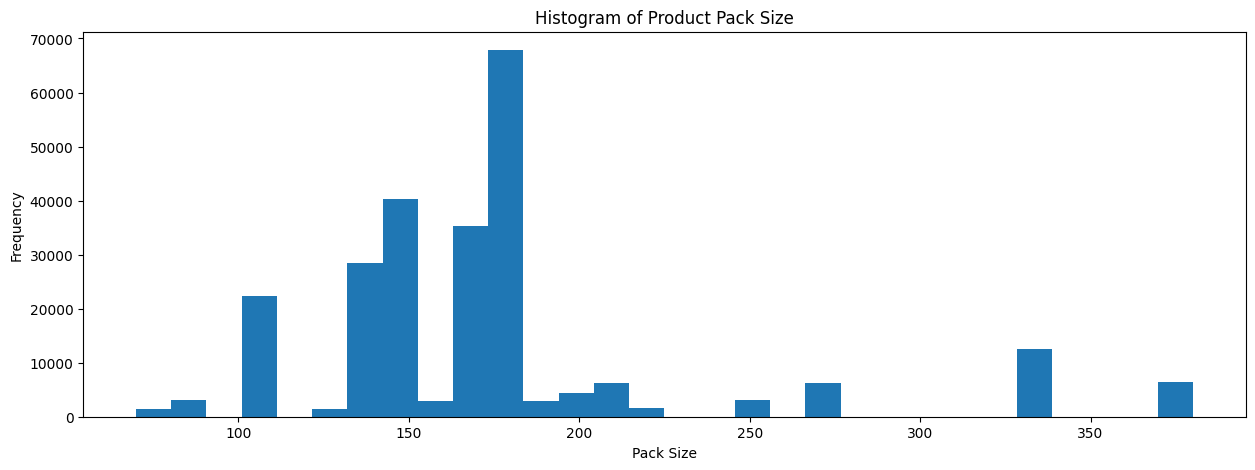

In [ ]:
# Let's plot a histogram of PACK_SIZE since we know that it is a categorical 
# variable and not a continuous variable even tough it is numeric
figure, ax=plt.subplots(figsize=(15,5))
plt.hist(QVI_merge['PACK_SIZE'],bins=30)
plt.title('Histogram of Product Pack Size')
plt.xlabel('Pack Size')
plt.ylabel('Frequency')
plt.show()

### Brand ###

In [ ]:
QVI_merge['BRAND']=QVI_merge['PROD_NAME'].str.split().str[0]
QVI_merge['BRAND'].nunique()
QVI_merge['BRAND'].unique()


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

In [ ]:
QVI_merge['BRAND']=QVI_merge['PROD_NAME'].str.extract(r'([A-Za-z]+)',expand=False)
QVI_merge['BRAND']=QVI_merge['BRAND'].str.strip()
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('RRD','Red')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Cheezels','Cheetos')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Doritos','Dorito')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('GrnWves','Grain')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Infzns','Infuzions')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Sunbites','Snbts')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('WW','Woolworths')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Smiths','Smith')
QVI_merge['BRAND']=QVI_merge['BRAND'].str.replace('Natural','NCC')
QVI_merge['BRAND'].unique()

array(['NCC', 'CCs', 'Smith', 'Kettle', 'Grain', 'Dorito', 'Twisties',
       'Woolworths', 'Thins', 'Burger', 'Cheetos', 'Infuzions', 'Red',
       'Pringles', 'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Snbts'],
      dtype=object)

### Check again

In [ ]:
QVI_merge['BRAND'].unique()

array(['NCC', 'CCs', 'Smith', 'Kettle', 'Grain', 'Dorito', 'Twisties',
       'Woolworths', 'Thins', 'Burger', 'Cheetos', 'Infuzions', 'Red',
       'Pringles', 'Tyrrells', 'Cobs', 'French', 'Tostitos', 'Snbts'],
      dtype=object)

C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_4076\3804482512.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='BRAND',data=brand_counts,palette='Set2')


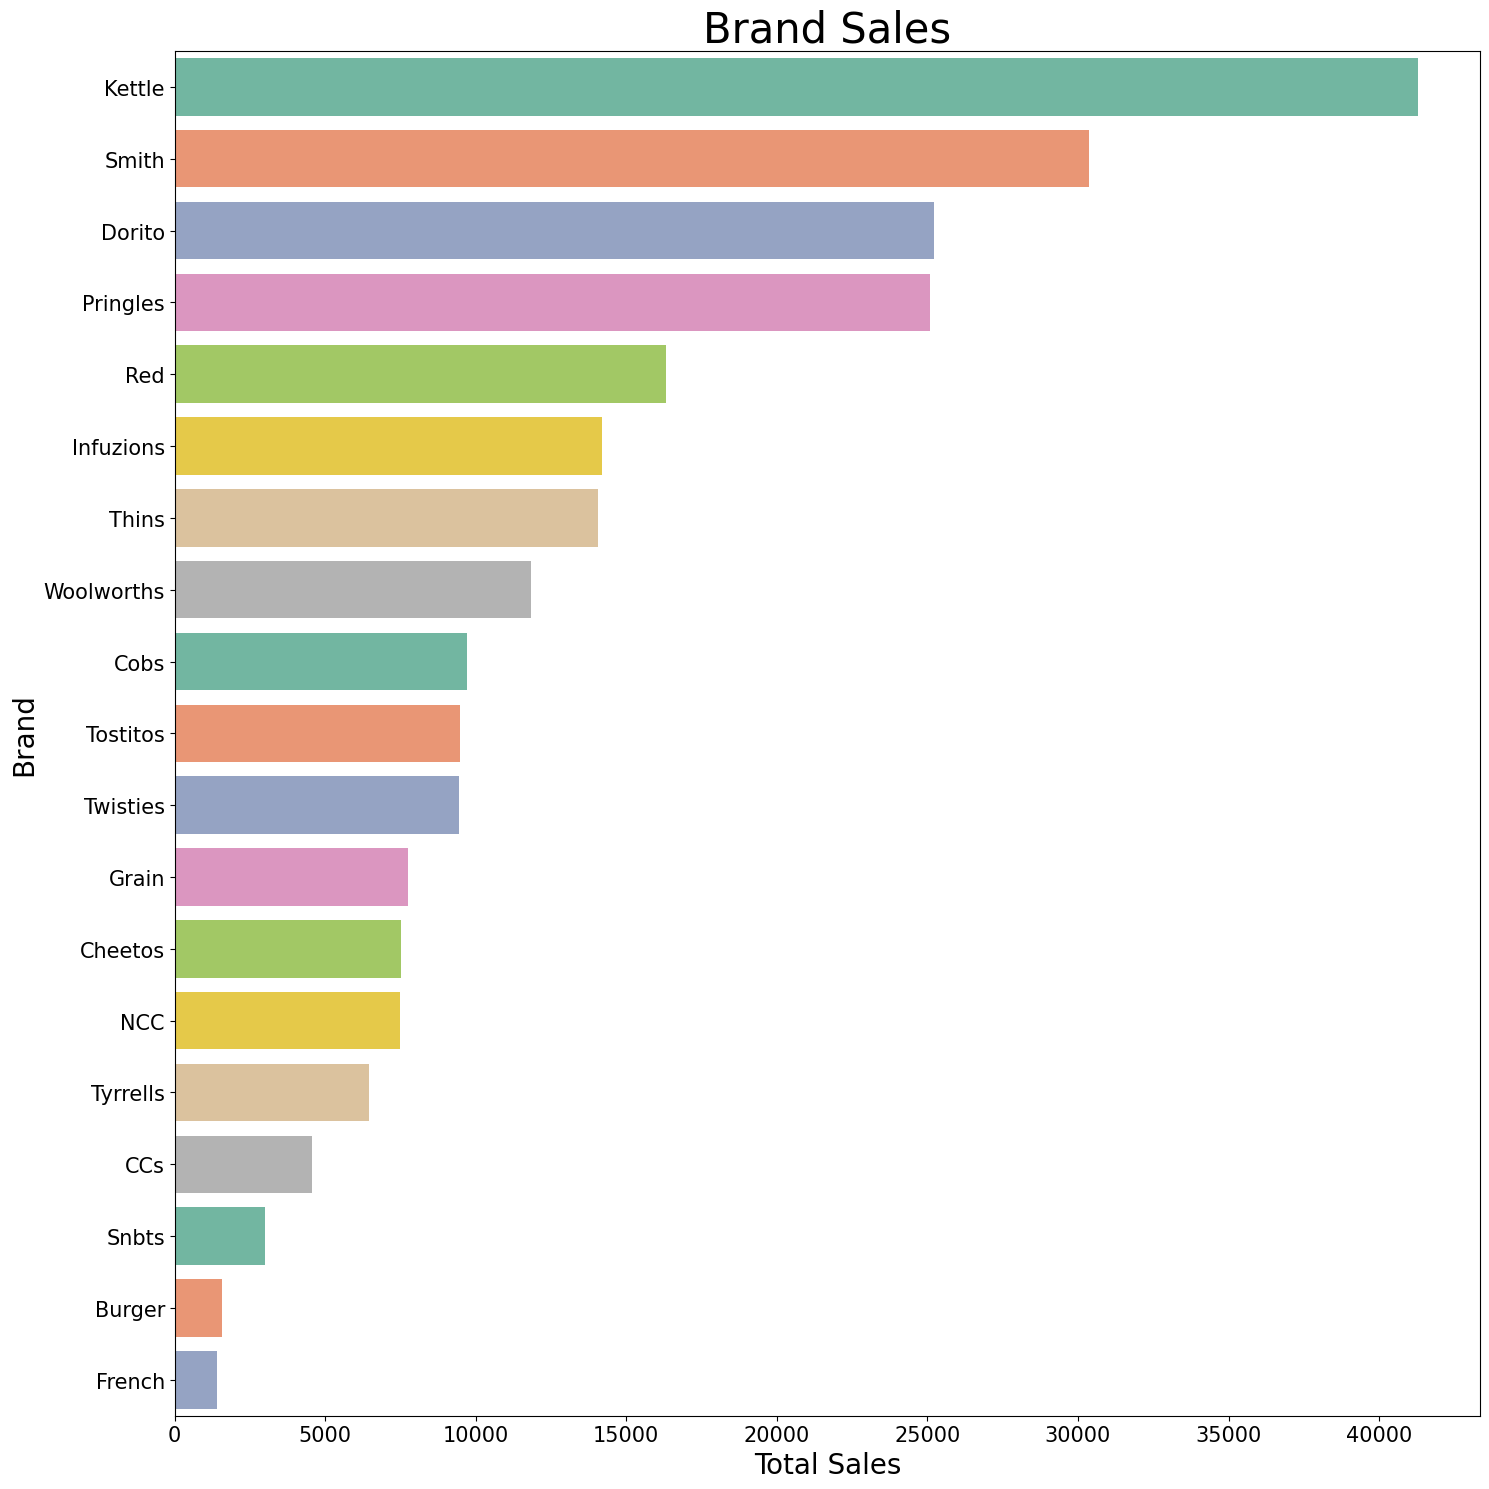

In [ ]:
brand_counts=QVI_merge['BRAND'].value_counts().reset_index()
figure, ax=plt.subplots(figsize=(15,15))
sns.barplot(x='count',y='BRAND',data=brand_counts,palette='Set2')
plt.title('Brand Sales', fontsize=30)
plt.xlabel('Total Sales',fontsize=20)
plt.ylabel('Brand',fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)
plt.tight_layout()
plt.show()



### Examining customer data ###

C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_4076\3162593901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='LIFESTAGE',data=life_style,palette='Set2')


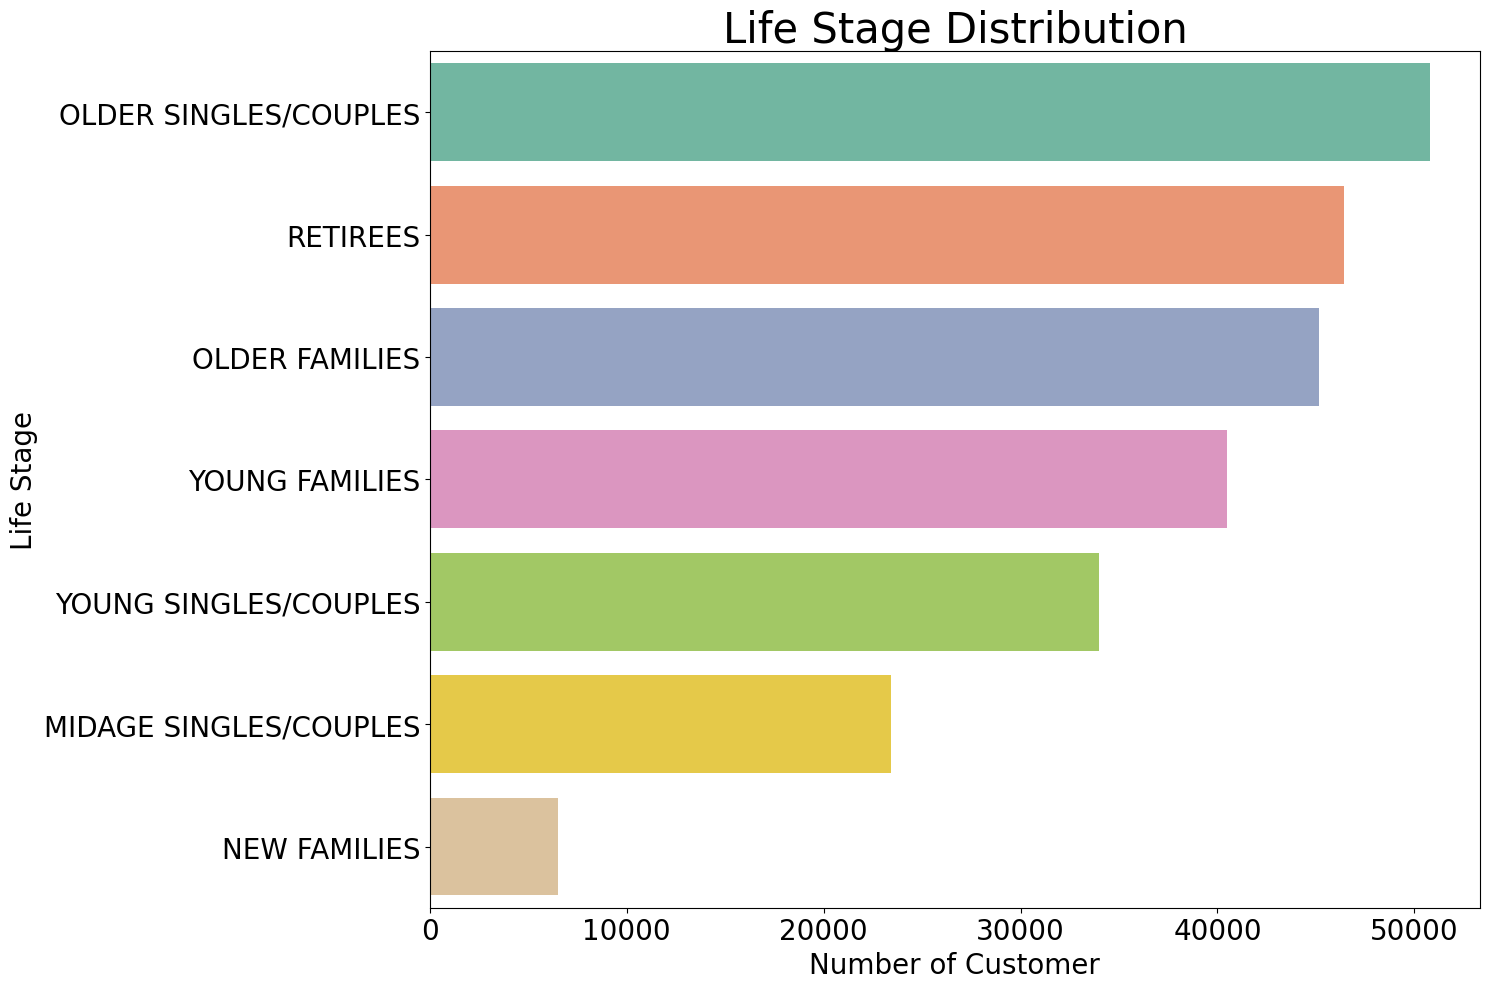

In [ ]:
life_style=QVI_merge['LIFESTAGE'].value_counts().reset_index()
life_style.columns=['LIFESTAGE','count']
figure, ax=plt.subplots(figsize=(15,10))
sns.barplot(x='count',y='LIFESTAGE',data=life_style,palette='Set2')
plt.title('Life Stage Distribution', fontsize=30)
plt.xlabel('Number of Customer',fontsize=20)    
plt.ylabel('Life Stage',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


C:\Users\xiaoyuwan\AppData\Local\Temp\ipykernel_4076\1050030581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count',y='PREMIUM_CUSTOMER',data=purchase_behavior,palette='Set2')


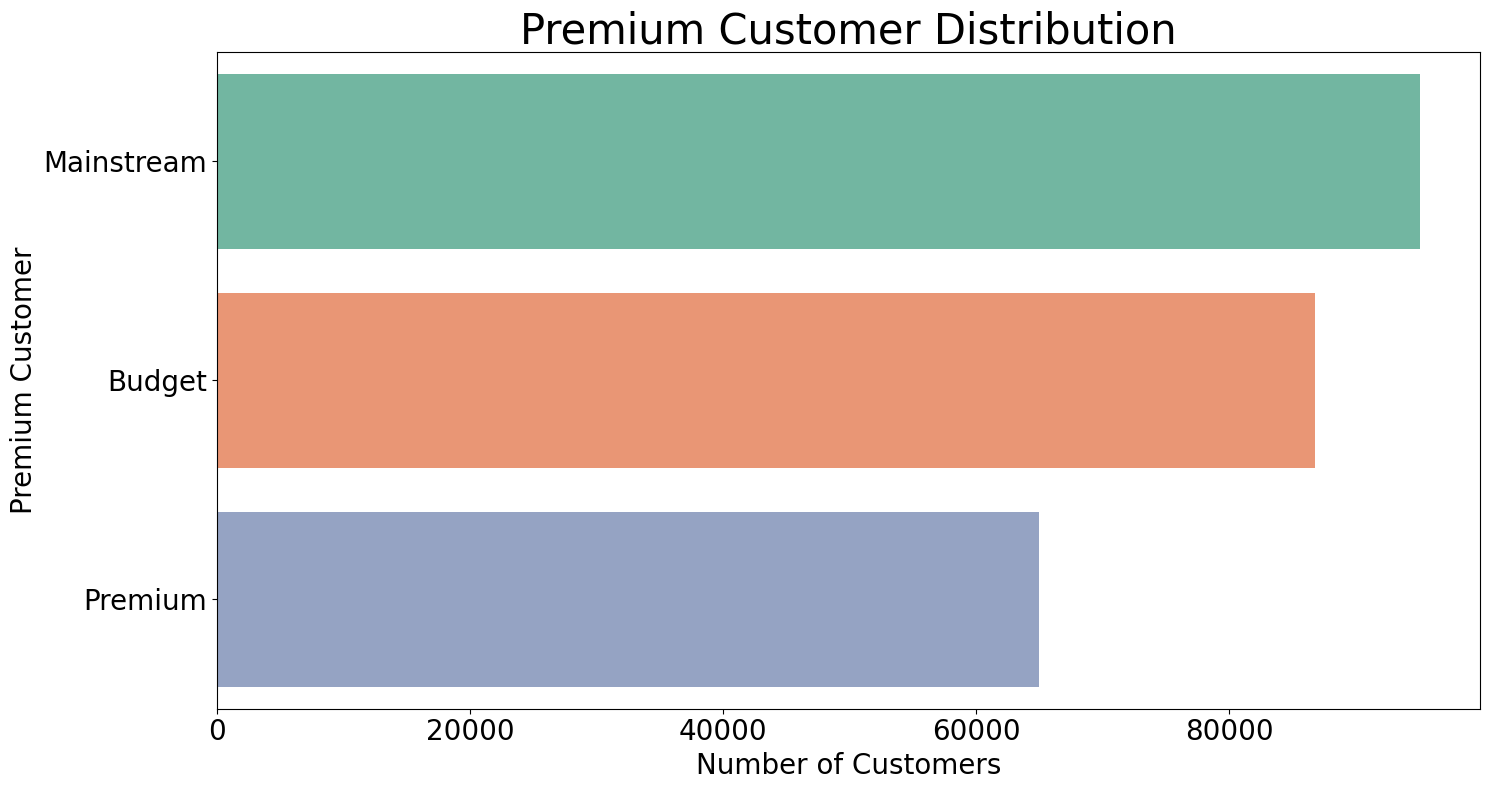

In [ ]:
purchase_behavior=QVI_merge['PREMIUM_CUSTOMER'].value_counts().reset_index()
purchase_behavior.columns=['PREMIUM_CUSTOMER','count']
figure, ax=plt.subplots(figsize=(15,8))
sns.barplot(x='count',y='PREMIUM_CUSTOMER',data=purchase_behavior,palette='Set2')
plt.title('Premium Customer Distribution', fontsize=30)
plt.xlabel('Number of Customers',fontsize=20)
plt.ylabel('Premium Customer',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

## Data Analysis on customer segments ##
Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment 

Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and plotting the split by these segments to describe which customer segment contribute most to chip sales.

### Total sales by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
Life_Premium=QVI_merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum','mean']).reset_index()
Life_Premium['proportion']=Life_Premium['sum']/Life_Premium['sum'].sum()
Life_Premium.sort_values(by='sum',ascending=False,inplace=True)
Life_Premium

,LIFESTAGE,PREMIUM_CUSTOMER,sum,mean,proportion
6,OLDER FAMILIES,Budget,156863.75,7.291241,0.086897
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20,7.551279,0.081755
13,RETIREES,Mainstream,145168.95,7.269352,0.080418
15,YOUNG FAMILIES,Budget,129717.95,7.302705,0.071859
9,OLDER SINGLES/COUPLES,Budget,127833.60,7.444305,0.070815
10,OLDER SINGLES/COUPLES,Mainstream,124648.50,7.306049,0.069051
11,OLDER SINGLES/COUPLES,Premium,123537.55,7.459997,0.068435
12,RETIREES,Budget,105916.30,7.445786,0.058674
7,OLDER FAMILIES,Mainstream,96413.55,7.281440,0.053409
14,RETIREES,Premium,91296.65,7.461315,0.050575


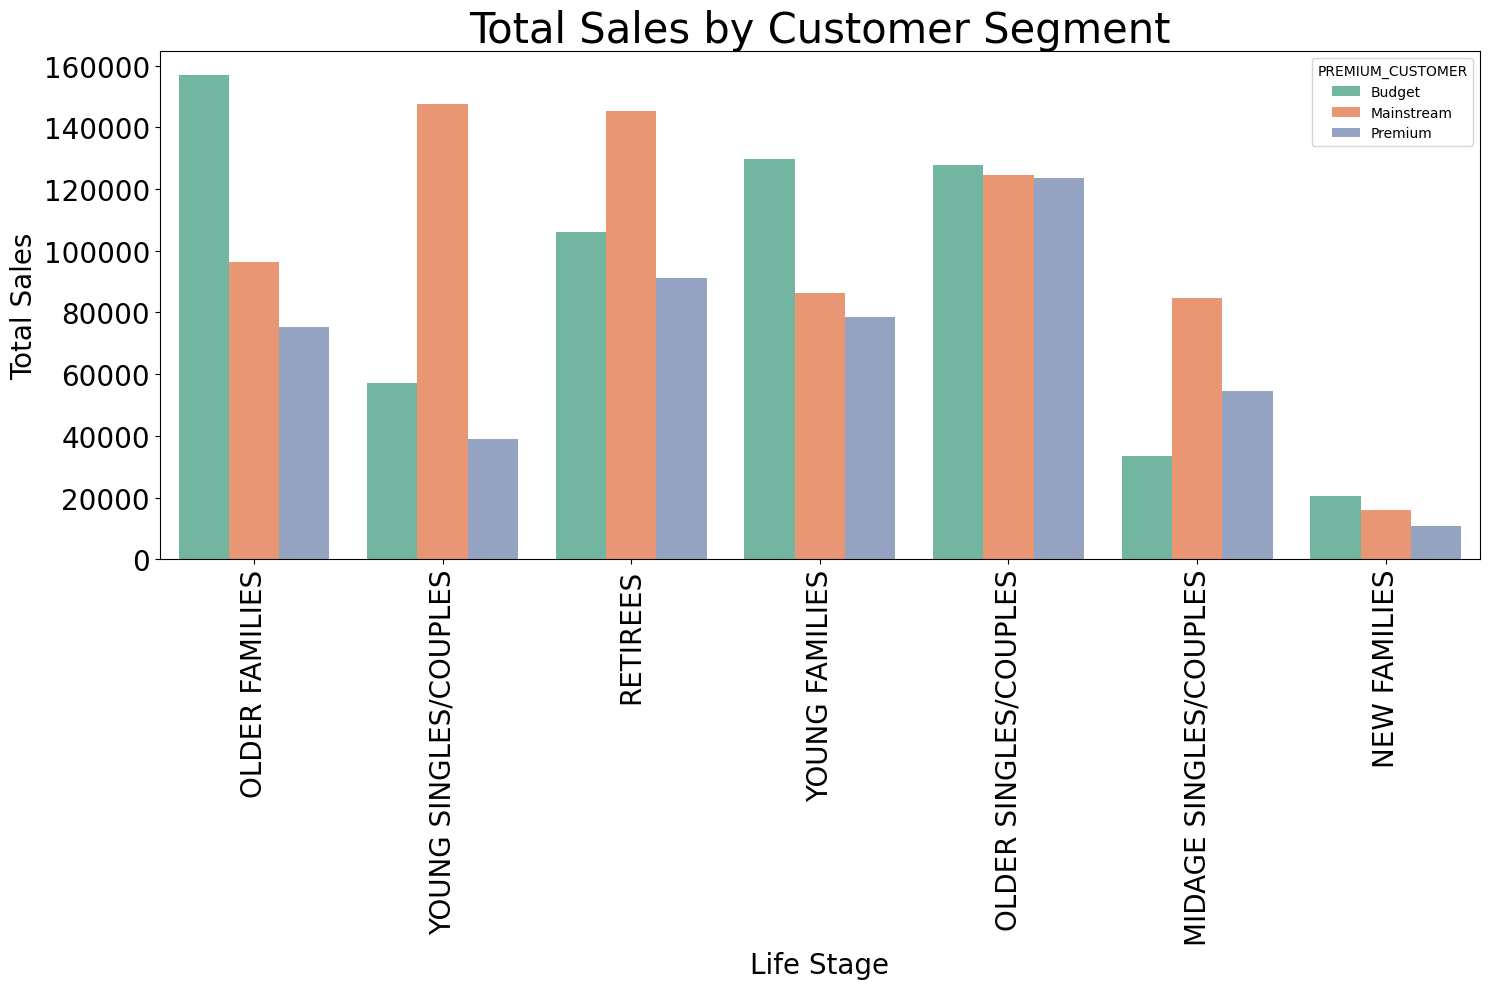

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='LIFESTAGE',y='sum',hue='PREMIUM_CUSTOMER',data=Life_Premium,palette='Set2')
plt.title('Total Sales by Customer Segment', fontsize=30)
plt.xlabel('Life Stage',fontsize=20)
plt.ylabel('Total Sales',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER ###

In [ ]:
Life_Premium_count=pd.crosstab(QVI_merge['LIFESTAGE'],QVI_merge['PREMIUM_CUSTOMER'])
Life_Premium_count

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,4691,11095,7612
NEW FAMILIES,2824,2185,1488
OLDER FAMILIES,21514,13241,10403
OLDER SINGLES/COUPLES,17172,17061,16560
RETIREES,14225,19970,12236
YOUNG FAMILIES,17763,11947,10784
YOUNG SINGLES/COUPLES,8573,19544,5852


In [ ]:
lp_customer=QVI_merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
lp_customer.columns=['LIFESTAGE','PREMIUM_CUSTOMER','count']
lp_customer['proportion']=lp_customer['count']/lp_customer['count'].sum()	

lp_customer

,LIFESTAGE,PREMIUM_CUSTOMER,count,proportion
0,MIDAGE SINGLES/COUPLES,Budget,1474,0.020677
1,MIDAGE SINGLES/COUPLES,Mainstream,3298,0.046264
2,MIDAGE SINGLES/COUPLES,Premium,2369,0.033232
3,NEW FAMILIES,Budget,1087,0.015248
4,NEW FAMILIES,Mainstream,830,0.011643
5,NEW FAMILIES,Premium,575,0.008066
6,OLDER FAMILIES,Budget,4611,0.064682
7,OLDER FAMILIES,Mainstream,2788,0.039110
8,OLDER FAMILIES,Premium,2231,0.031296
9,OLDER SINGLES/COUPLES,Budget,4849,0.068021


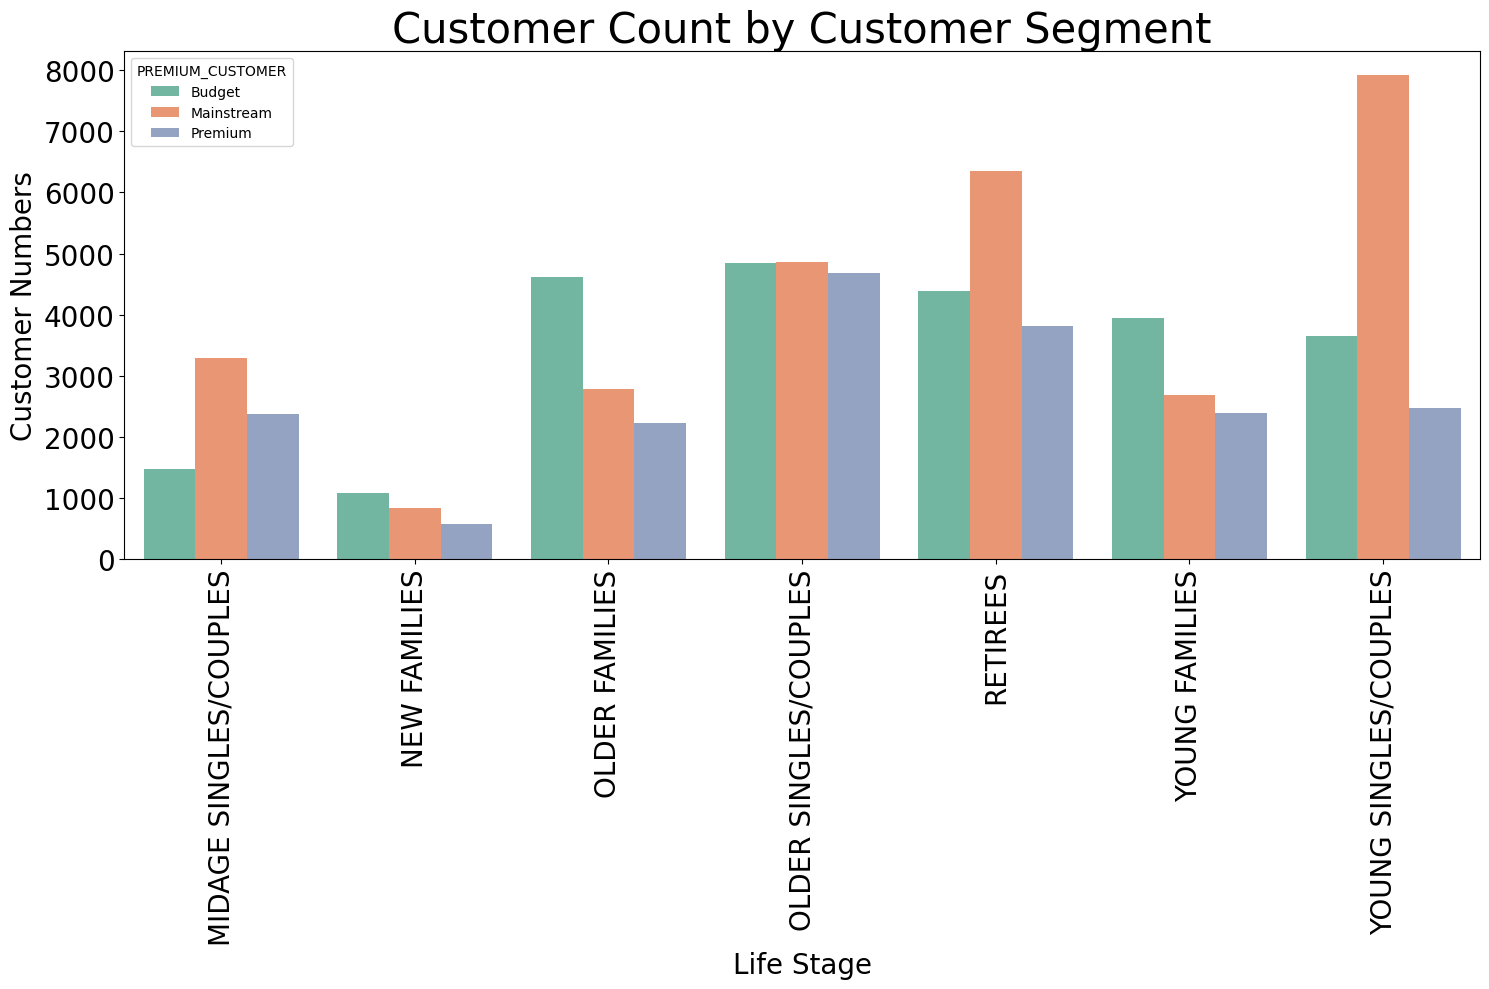

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='LIFESTAGE',y='count',hue='PREMIUM_CUSTOMER',data=lp_customer,palette='Set2')
plt.title('Customer Count by Customer Segment', fontsize=30)
plt.xlabel('Life Stage',fontsize=20)
plt.ylabel('Customer Numbers',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

### Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER ###

In [ ]:
avg_unit_price=QVI_merge['TOT_SALES']/QVI_merge['PROD_QTY']
QVI_merge['AVG_UNIT_PRICE']=avg_unit_price
AVG_price=QVI_merge.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['AVG_UNIT_PRICE'].mean().reset_index()
AVG_price

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_UNIT_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.743328
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994241
2,MIDAGE SINGLES/COUPLES,Premium,3.770698
3,NEW FAMILIES,Budget,3.917688
4,NEW FAMILIES,Mainstream,3.916133
5,NEW FAMILIES,Premium,3.872110
6,OLDER FAMILIES,Budget,3.745340
7,OLDER FAMILIES,Mainstream,3.737077
8,OLDER FAMILIES,Premium,3.717000
9,OLDER SINGLES/COUPLES,Budget,3.882096


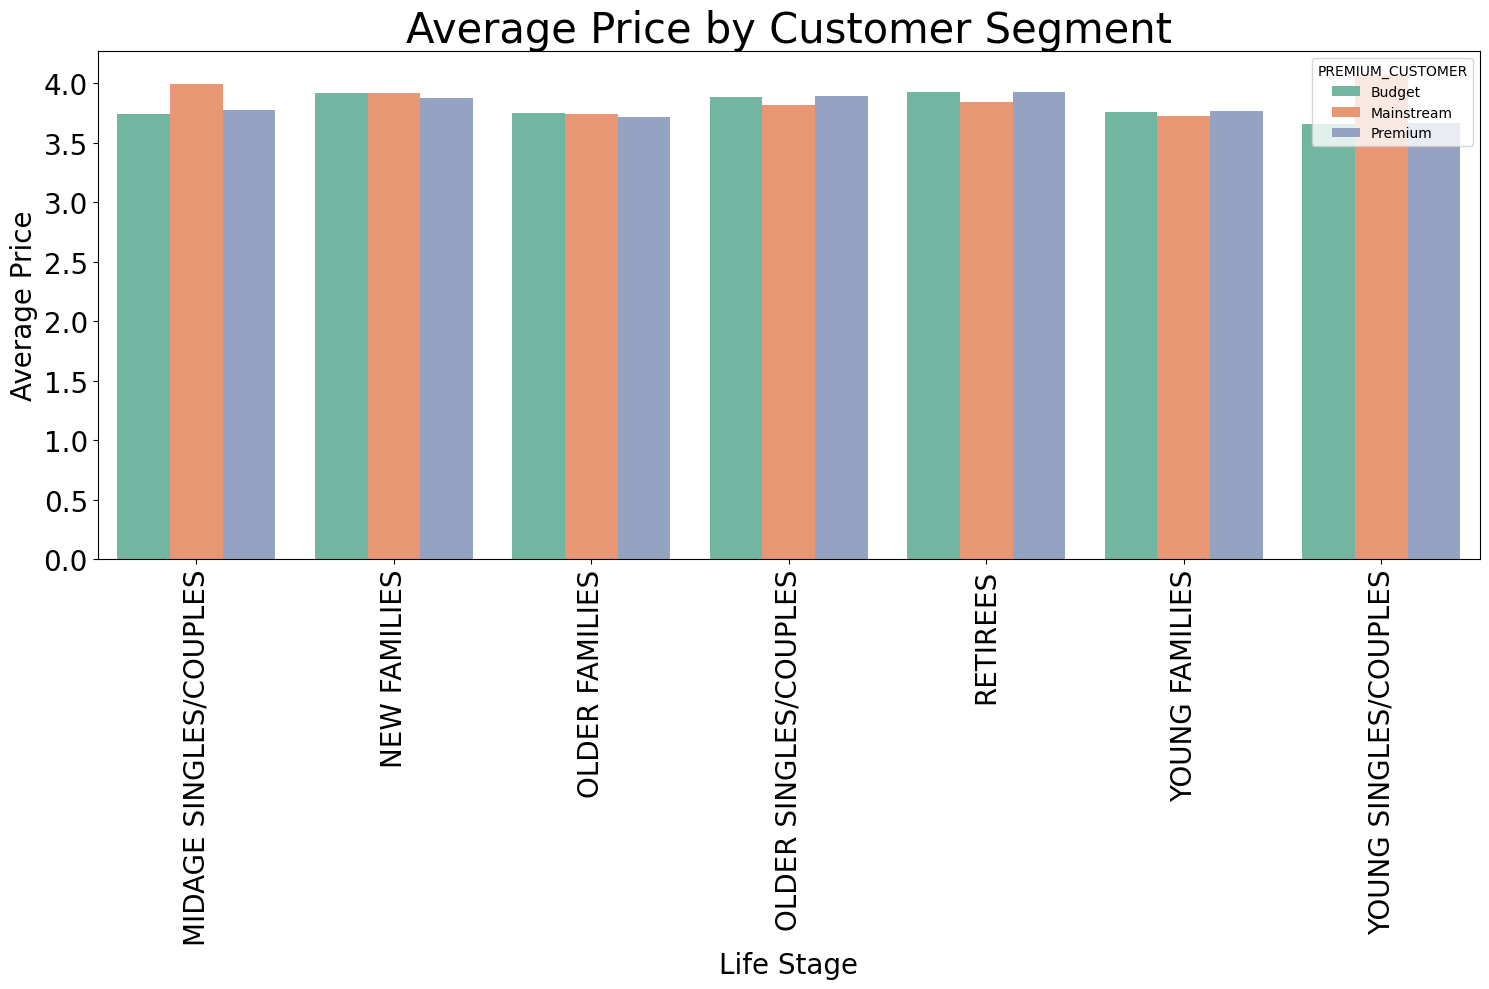

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x='LIFESTAGE',y='AVG_UNIT_PRICE',hue='PREMIUM_CUSTOMER',data=AVG_price,palette='Set2')
plt.title('Average Price by Customer Segment', fontsize=30) 
plt.xlabel('Life Stage',fontsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [ ]:

QVI_merge['Average_price']=QVI_merge['TOT_SALES']/QVI_merge['PROD_QTY']
Average_price=pd.DataFrame(QVI_merge['TOT_SALES']/QVI_merge['PROD_QTY'])
Average_price.columns=['Average Price']
Average_price


,Average Price
0,3.00
1,2.10
2,1.45
3,3.00
4,4.60
...,...
264831,5.40
264832,4.40
264833,4.40
264834,3.90


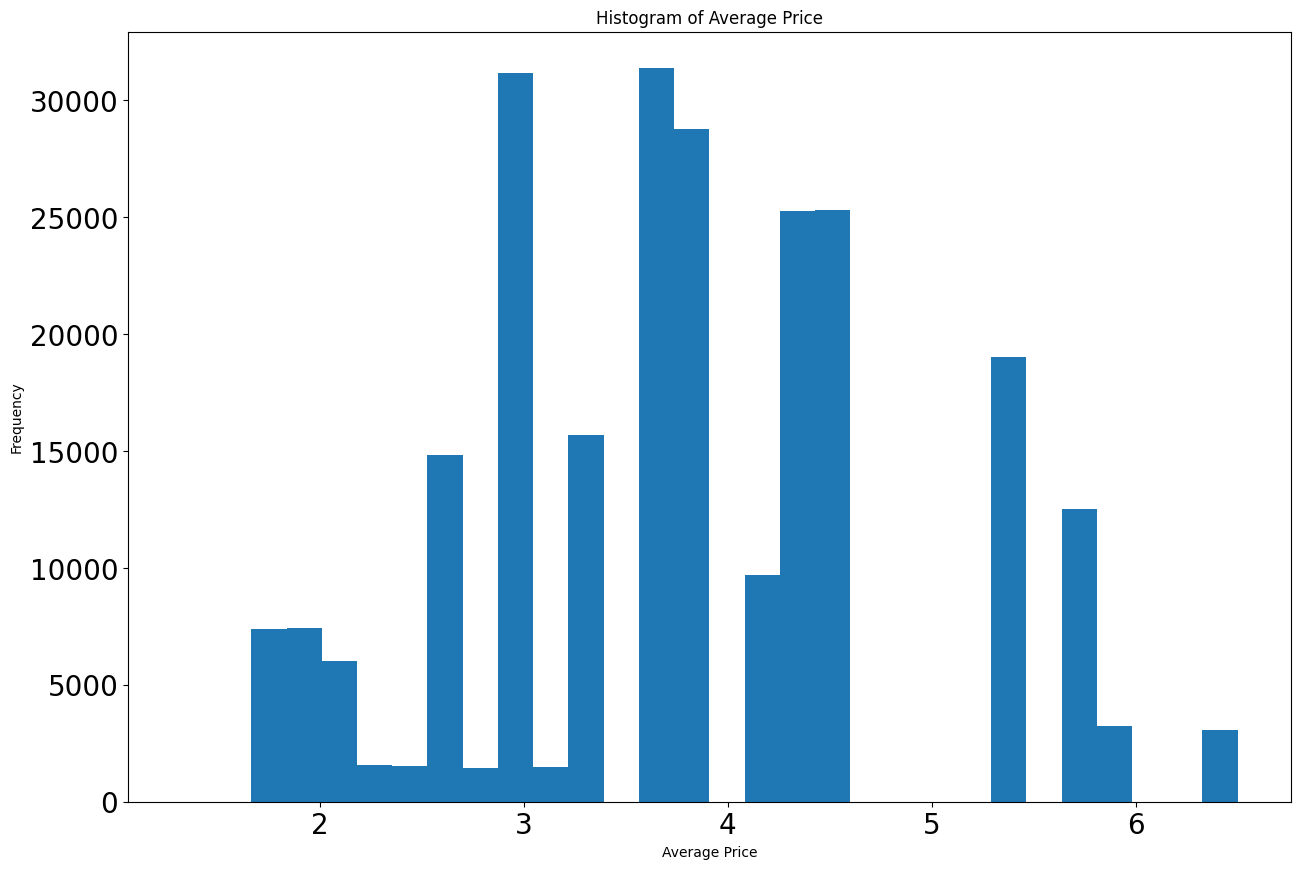

In [ ]:
plt.figure(figsize=(15,10))
plt.hist(Average_price['Average Price'],bins=30)
plt.title('Histogram of Average Price')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [ ]:
from scipy import stats


In [ ]:
target_lifestage=['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']
filtered = QVI_merge[QVI_merge['LIFESTAGE'].isin(target_lifestage)]
mainstream = filtered[filtered['PREMIUM_CUSTOMER'] == 'Mainstream']['Average_price']
non_mainstream = filtered[filtered['PREMIUM_CUSTOMER'] != 'Mainstream']['Average_price']
t_test_mainstream =stats.ttest_ind(mainstream, non_mainstream, equal_var=False)
t_test_mainstream

TtestResult(statistic=37.6243885962295, pvalue=6.967354233018139e-306, df=54791.09392740315)

The t-test results in a p-value of approximate to 0, the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.

### Dive into Mainstream, yong single/couples 

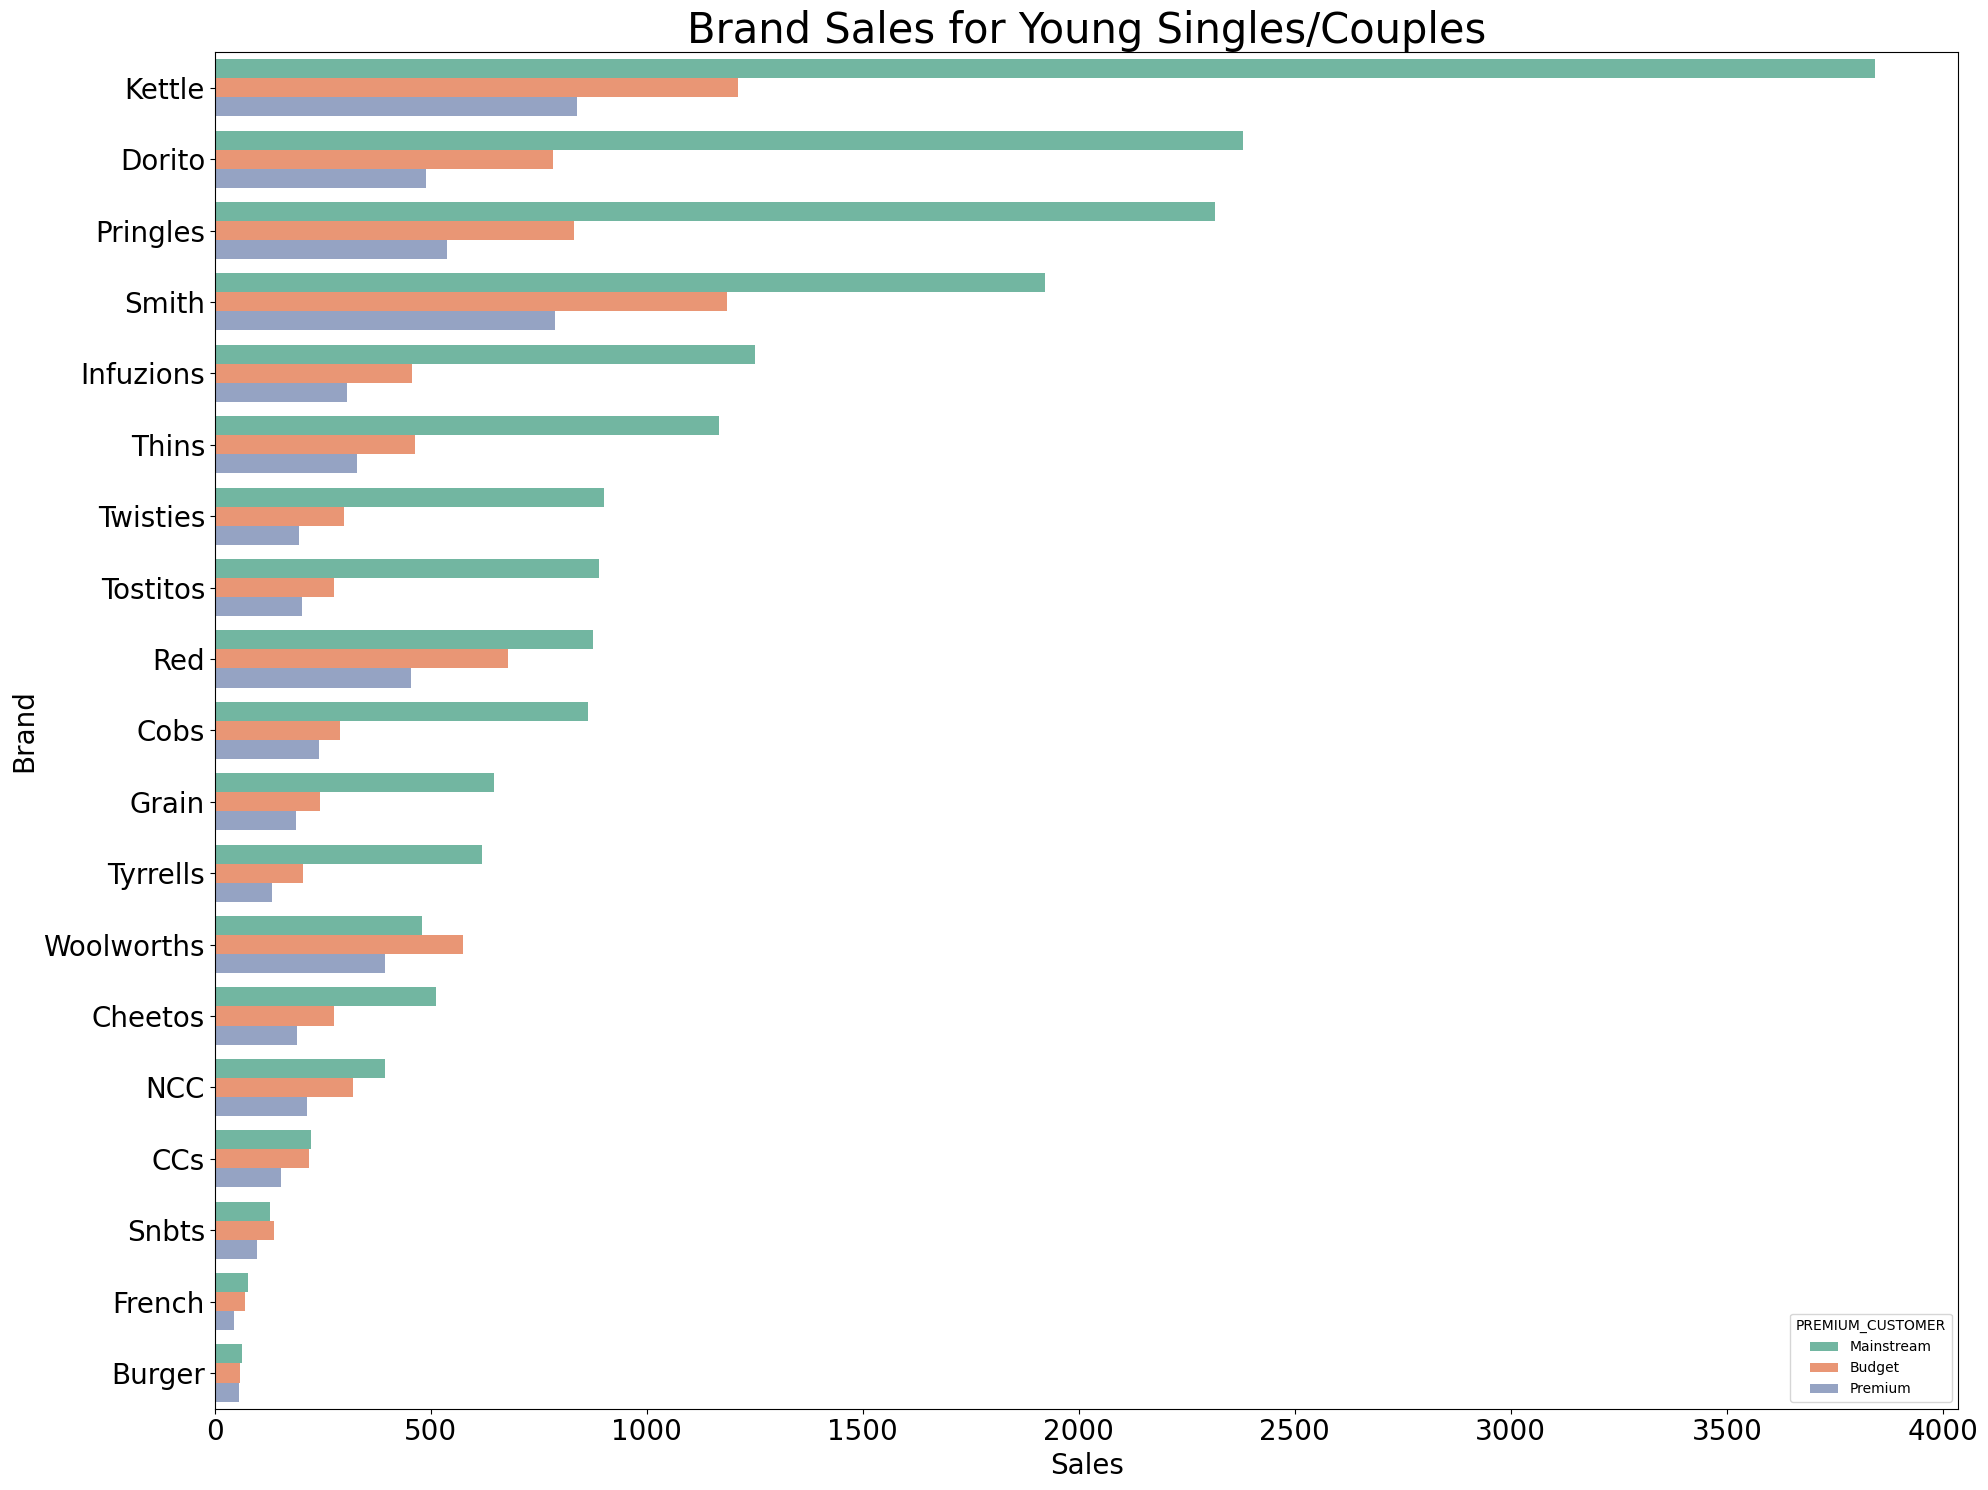

In [ ]:
Young_single_couples=QVI_merge[QVI_merge['LIFESTAGE']=='YOUNG SINGLES/COUPLES']
brand_counts=Young_single_couples.groupby('BRAND')['PREMIUM_CUSTOMER'].value_counts().reset_index()
brand_counts=brand_counts.sort_values(by='count',ascending=False)
FIGURE, ax=plt.subplots(figsize=(20,15))
sns.barplot(x='count',y='BRAND',hue='PREMIUM_CUSTOMER',data=brand_counts,palette='Set2')
plt.title('Brand Sales for Young Singles/Couples', fontsize=30)
plt.xlabel('Sales',fontsize=20)
plt.ylabel('Brand',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()



In [ ]:
average_price_brand=QVI_merge.groupby('BRAND')['Average_price'].mean().reset_index()
average_price_brand=average_price_brand.sort_values(by='Average_price',ascending=False)
average_price_brand

,BRAND,Average_price
8,Kettle,4.936630
4,Dorito,4.679196
16,Twisties,4.499439
15,Tostitos,4.400000
17,Tyrrells,4.199783
2,Cheetos,3.975803
3,Cobs,3.800000
12,Smith,3.770631
10,Pringles,3.699838
7,Infuzions,3.651299


##  Customer Analysis

- **Kettle** is the most favored chip brand among all customer segments.

- **New Families** represent the **smallest customer segment**, while **Older Singles/Couples**, **Retirees**, and **Young Singles/Couples** form the **largest groups**, with comparable sizes.

- Most customers are **Mainstream**, followed by **Budget**, and then **Premium**.


###  Total Sales

- **Highest contributing segments**:
  - **Older Families (Budget)**
  - **Young Singles/Couples (Mainstream)**
  - **Retirees (Mainstream)**

- **Lowest contributing segments**:
  - **New Families (Premium)**
  - **New Families (Mainstream)**
  - **New Families (Budget)**

>  **New Families bought the least amount of chips across all premium tiers.**

###  Customer Counts

- **Top 3 segments** by customer count:
  1. **Young Singles/Couples (Mainstream)**
  2. **Retirees (Mainstream)**
  3. **Older Singles/Couples (Mainstream)**

- **Bottom 3 segments** by customer count:
  1. **New Families (Premium)**
  2. **New Families (Mainstream)**
  3. **New Families (Budget)**

>  **Mainstream** is the largest customer category overall.  
> **New Families** is the smallest segment in terms of both sales and population.
##  Customer Analysis: Average Price Comparison

###  Target Segment
This analysis focuses on customers identified as **Young Singles/Couples** and **Midage Singles/Couples**, with a comparison between those classified as **Mainstream** and those classified as **Non-Mainstream** (i.e., Budget and Premium).

###  Hypotheses

- **Null Hypothesis (H₀):**  
  There is no significant difference in the average price per packet of chips purchased between Mainstream and Non-Mainstream customers within the Young and Midage Singles/Couples segments.  
  $H_0: \mu_{\text{Mainstream}} = \mu_{\text{Non-Mainstream}}$

- **Alternative Hypothesis (H₁):**  
  There is a significant difference in the average price per packet of chips purchased between the two groups.  
  $H_1: \mu_{\text{Mainstream}} \ne \mu_{\text{Non-Mainstream}}$

###  Statistical Test Result

Although this difference is not visually apparent in bar chart comparisons, the results of an independent t-test indicate that the difference in average price per packet between **Mainstream** and **Non-Mainstream** customers within this demographic is **statistically significant**. This suggests a meaningful distinction in purchasing behaviour between these groups.

---

##  Behavioural Insights: Young Singles/Couples

- The majority of **Young Singles/Couples** fall under the **Mainstream** customer classification.

- The most frequently purchased brands among this group are:
  - **Kettle**
  - **Dorito**
  - **Pringles**

- The least frequently purchased brands include:
  - **Snbts (Sunbites)**
  - **French Fries**
  - **Burger Rings**

It is noteworthy that **Kettle** and **Dorito**, two of the most popular brands among this group, also have among the **highest average prices**. This indicates that **younger customers exhibit a strong preference for premium-positioned products**, suggesting that **brand affinity and perceived quality may influence purchasing decisions more than price alone** in this segment.
